Import the following packages:

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

Source: https://towardsdatascience.com/polynomial-regression-bbe8b9d97491
### Polynomial Regression
To understand the need for polynomial regression, let’s generate some random dataset first.

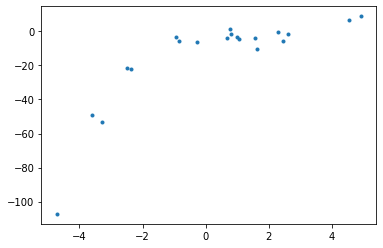

In [4]:
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)
plt.plot(x,y, '.');

Applying a linear model:

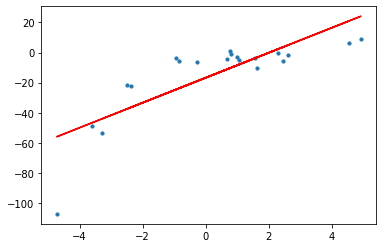

In [5]:
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis because .fit needs x to be a matrix
x = x[:, np.newaxis]

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r')

We can see that the straight line is unable to capture the patterns in the data. This is an example of underfitting. Computing the R²-score of the linear line gives:

In [6]:
print("R^2:", model.score(x,y))

R^2: 0.6386750054827147


To overcome under-fitting, we need to increase the complexity of the model.
To generate a higher order equation we can add powers of the original features as new features. The linear model, $Y=\theta_0+\theta_1 x$ can be transformed to:

$Y=\theta_0+\theta_1 x+\theta_2 x^2$.

**This is still considered to be linear model as the coefficients/weights $\theta_i$ associated with the features are still linear. $x^2$ is only a feature. However, the curve that we are fitting is quadratic in nature.**

To convert the original features into their higher order terms we will use the PolynomialFeatures class provided by scikit-learn. Next, we train the model using Linear Regression.

In [7]:
#get polynomial features
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

#apply linear model
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

Our R^2 goes up considerably:

In [8]:
print(model.score(x_poly,y))

0.8537647164420812


What is PolynomialFeatures actually doing? Generating a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if x=3 is an input value in the original data set, then poly.fit_transform(x) transforms this value into the array [1 3 9], corresponding to $\theta_0+\theta_1(3)+\theta_2(3^2)$. As another example, compare the first x-value in our data set with the first transformed value:

In [9]:
poly = PolynomialFeatures(2)
x_poly = poly.fit_transform(x)
print('original value', x[0])
print('transformed value', x_poly[0])

original value [-3.29215704]
transformed value [ 1.         -3.29215704 10.83829796]


Similarly, the entire dataset of transformed input is:

In [10]:
poly = PolynomialFeatures(2)
x_poly = poly.fit_transform(x)
print(x_poly)

[[ 1.         -3.29215704 10.83829796]
 [ 1.          0.79952837  0.63924562]
 [ 1.         -0.93621395  0.87649656]
 [ 1.         -4.7226796  22.30370258]
 [ 1.         -3.60267397 12.97925974]
 [ 1.          4.93183364 24.32298305]
 [ 1.         -0.85026525  0.722951  ]
 [ 1.          2.45407162  6.02246754]
 [ 1.          2.30965656  5.3345134 ]
 [ 1.          0.76820449  0.59013814]
 [ 1.          1.56786929  2.4582141 ]
 [ 1.         -2.36282052  5.58292081]
 [ 1.         -0.28311318  0.08015307]
 [ 1.          1.63497495  2.67314309]
 [ 1.          0.6684103   0.44677233]
 [ 1.          0.99897702  0.99795508]
 [ 1.         -2.48223722  6.16150161]
 [ 1.          2.61547479  6.84070838]
 [ 1.          1.0607969   1.12529005]
 [ 1.          4.56228722 20.81446466]]


Fitting a **linear** regression model on the transformed features gives the below plot.

Text(0, 0.5, 'y')

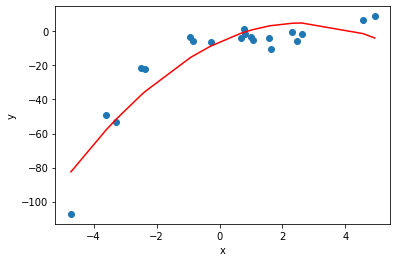

In [11]:
plt.scatter(x,y)

#sort the values of x before line plot or else you get zigzags
sorted_zip = sorted(zip(x,y_poly_pred))
x_plot, y_poly_pred = zip(*sorted_zip)
plt.plot(x_plot, y_poly_pred, color='r')
plt.xlabel('x')
plt.ylabel('y')

### Another polynomial regression example

The above model only contained a single predictor variable, x. What if there were two predictor variables, $a$ and $b$? Then the degree-2 polynomial features are [1, a, b, a^2, ab, b^2]. As an example, consider the input:

In [12]:
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

Then the polynomial features are given by:

In [13]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

### Pipelines

For this dataset, we needed to first obtain polynomial features and then apply a linear regression model. When several steps are needed, it is good practice to create a pipeline:

0.8537647164420812


Text(0, 0.5, 'y')

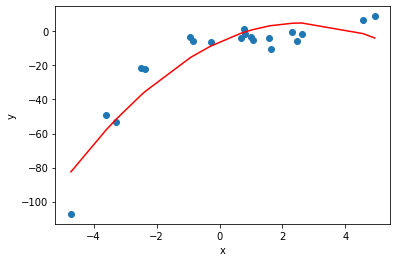

In [14]:
model = make_pipeline(PolynomialFeatures(2), LinearRegression())

#fit the model and use it to predict y
model.fit(x, y)
y_poly_pred = model.predict(x)
print(model.score(x,y))

#plot stuff
#sort the values of x before line plot or else you get zigzags
plt.scatter(x,y)
sorted_zip = sorted(zip(x,y_poly_pred))
x_plot, y_poly_pred = zip(*sorted_zip)
plt.plot(x_plot, y_poly_pred, color='r')
plt.xlabel('x')
plt.ylabel('y')

Let's understand a bit more how you can access specifics of the pipeline. First, print the model and notice that there are two items contained in the list steps. The first is a tuple containing the PolynomialFeatures method called "polynomialfeatures" and the second is a tuple containing the LinearRegression model called "linear regression":

In [15]:
model

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

If you wanted to access the y-intercept and coefficients contained in the linear regression model, you would first need to access the second tuple contained in steps:

In [16]:
model.steps[1]

('linearregression',
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False))

You would then access the second item of the tuple (the first is the label "linear regression" and the second is the actual model):

In [17]:
model.steps[1][1]

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

You could then print the intercept and coefficients:

In [18]:
print(model.steps[1][1].intercept_)
print(model.steps[1][1].coef_)

-6.119739594096467
[ 0.          8.48492679 -1.62853134]


You ignore the first 0 coefficient contained in the coef list to find that the model is:

$y_{\text{predicted}} = -6.119739594096467 + 8.48492679 x + -1.62853134 x^2$

Actually, remember that we should also employ feature scaling using StandardScaler. Then, our pipeline will contain three steps:

0.8537647164420812


Text(0, 0.5, 'y')

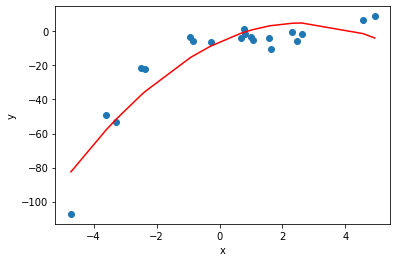

In [19]:
model = make_pipeline(PolynomialFeatures(2), 
                      StandardScaler(),
                      LinearRegression())

#fit the model and use it to predict y
model.fit(x, y)
y_poly_pred = model.predict(x)
print(model.score(x,y))

#plot stuff
#sort the values of x before line plot or else you get zigzags
plt.scatter(x,y)
sorted_zip = sorted(zip(x,y_poly_pred))
x_plot, y_poly_pred = zip(*sorted_zip)
plt.plot(x_plot, y_poly_pred, color='r')
plt.xlabel('x')
plt.ylabel('y')

We can see the three steps of our pipeline here:

In [20]:
print(model)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)


If we wanted to get the scaled feature data, we would need to get it from the second step (the StandardScaler step):

In [21]:
print(model.steps[1][1].fit_transform(x))

[[-1.40524809]
 [ 0.19898942]
 [-0.48154749]
 [-1.96611671]
 [-1.52699325]
 [ 1.81915286]
 [-0.44784936]
 [ 0.8476904 ]
 [ 0.79106922]
 [ 0.18670819]
 [ 0.5002348 ]
 [-1.04088075]
 [-0.2254846 ]
 [ 0.52654509]
 [ 0.14758163]
 [ 0.27718776]
 [-1.08770076]
 [ 0.91097215]
 [ 0.30142564]
 [ 1.67426385]]


### Fitting an nth-degree polynomial
Let us do another example. We'll generate points on a sine curve:

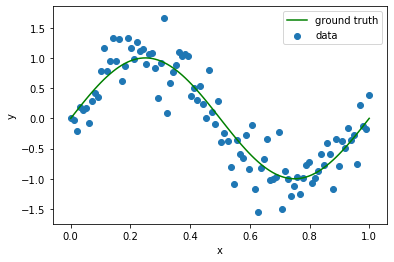

In [22]:
# We start by seeding the random number generator so that everyone will have the same "random" results
np.random.seed(9)

# Function that returns the sin(2*pi*x)
def f(x):
    return np.sin(2 * np.pi * x)

# This returns 100 evenly spaced numbers from 0 to 1
X_plot = np.linspace(0, 1, 100)

#applying model.predict(X) needs the X to be a matrix so the line below adds another dimension
X = X_plot[:, np.newaxis]

# Generate the y values by taking the sin and adding a random Gaussian (normal) noise term
y = f(X_plot) + np.random.normal(0,.3,100)


# Plot the training data against what we know to be the ground truth sin function
fig,ax = plt.subplots(1,1)
ax.plot(X_plot, f(X_plot), label='ground truth', color='green')
ax.scatter(X_plot, y, label='data')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.legend()

Now that we have our data and know the ground truth, let's try fitting a 3rd degree polynomial to our training data and see how it looks.  3rd degree makes sense for this interval because the sin function has 2 turning points over the interval [0,1] and a 3rd degree polynomial will have 2 (or less) turning points.

We first define a function `plot_approximation` that takes a pipeline of steps from make_pipeline and some plotting info and will plot the results of the sklearn pipeline on the specified plot with the ground truth and data in the background.

In [23]:
# Plot the results of a pipeline against ground truth and actual data
def plot_approximation(model, ax, x_plot, y, label=None):
    """ Plot the approximation of ``model`` on axis ``ax``. """
    ax.plot(x_plot, f(x_plot), 'g', label="ground truth")
    ax.scatter(x_plot, y, s=10)
    x = x_plot[:, np.newaxis]
    ax.plot(x_plot, model.predict(x), color='red', label=label)
    ax.set_ylim((-2, 2))
    ax.set_xlim((0, 1))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='upper right')

Now let's generate our pipeline for a 3rd degree polynomial and try it out in our plotting function.  Note that the steps are:
- Use PolynomialFeatures(3) to create a generator of 3rd degree polynomials
- Feed this generator to make_pipeline along with a LinearRegression object to tell it to string together these operations when given a new set of input predictor variables.  This results in a new model object that has the same `fit()`, `score()`, `predict()`, etc functions
- Call `fit()` on our new object to fit a 3rd degree polynomial regression
- Send the result to our plotting function to view the results

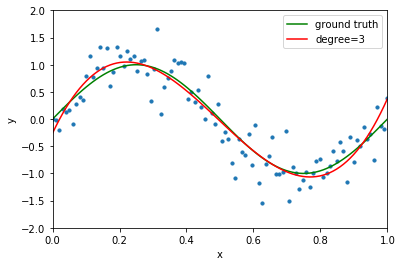

In [24]:
# Set up the plot
fig,ax = plt.subplots(1,1)

# Set the degree of our polynomial and fit the model
degree = 3
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X, y)

plot_approximation(model, ax, X_plot, y, label='degree=%d' % degree)

Let's plot a fit of degree 2 to verify that it gets worse:

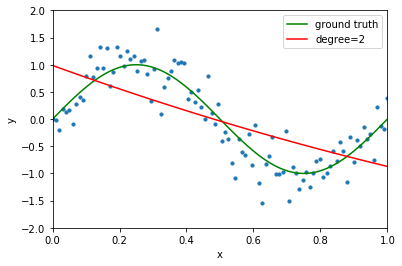

In [25]:
# Set up the plot
fig,ax = plt.subplots(1,1)

# Set the degree of our polynomial and fit the model
degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X, y)

plot_approximation(model, ax, X_plot, y, label='degree=%d' % degree)

Alright, well if the higher degree the better, why not plot degree 27?

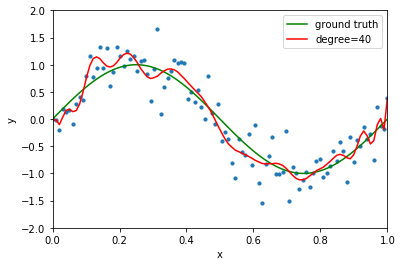

In [26]:
# Set up the plot
fig,ax = plt.subplots(1,1)

# Set the degree of our polynomial and fit the model
degree = 40
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X, y)

plot_approximation(model, ax, X_plot, y, label='degree=%d' % degree)

(Source: https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/)


Higher degree polynomials will fit the training data better, but the testing data worse. This problem is called as over-fitting. We also say that an overfit the model has high variance and low bias. Similarly, we have another problem called underfitting, it occurs when our model neither fits the training data nor generalizes on the new data. Our model is underfit when we have high bias and low variance. We can view the various situations below:

![title](images/reg1.png)

![title](images/reg2.png)

**Bias** refers to the error due to the model’s simplistic assumptions in fitting the data. A high bias means that the model is unable to capture the patterns in the data and this results in under-fitting.

**Variance** refers to the error due to the complex model trying to fit the data. High variance means the model passes through most of the data points and it results in over-fitting the data.

What does that bias and variance actually mean? Let us understand this by an example of archery targets.

<img src="images/reg4.png" width="400">

Let’s say we have model which is very accurate, therefore the error of our model will be low, meaning a low bias and low variance as shown in first figure. All the data points fit within the bulls-eye. Similarly we can say that if the variance increases, the spread of our data point increases which results in less accurate prediction. And as the bias increases the error between our predicted value and the observed values increases.

Now how this bias and variance is balanced to have a perfect model? Take a look at the image below and try to understand.

<img src="images/reg3.png" width="400">

Let's view how a higher degree polynomial will fit the training data better but the testing data worse. First, view the fits on the training data:

degree:  0     R^2: -0.0012117357594156886
degree:  1     R^2: 0.3888798353915932
degree:  3     R^2: 0.797568546442723
degree:  9     R^2: 0.5048513992003683


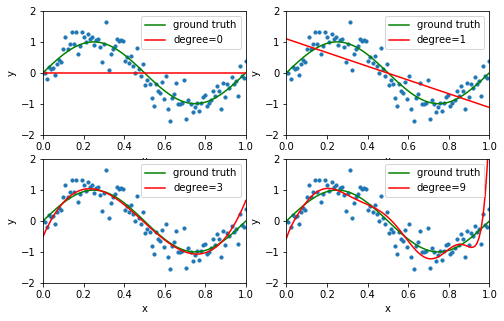

In [27]:
#slit the data into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

#set up four subplots
fig, axes = plt.subplots(2, 2, figsize=(8, 5))

#fit different polynomials and plot approximations
for ax, degree in zip(axes.ravel(), [0, 1, 3, 9]):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    print("degree: ", degree, "    R^2:", model.score(X_test, y_test))
    plot_approximation(model, ax, X_plot, y, label='degree=%d' % degree)
    

Now, view a plot of the error as a function of polynomial degree for degrees 1-9:

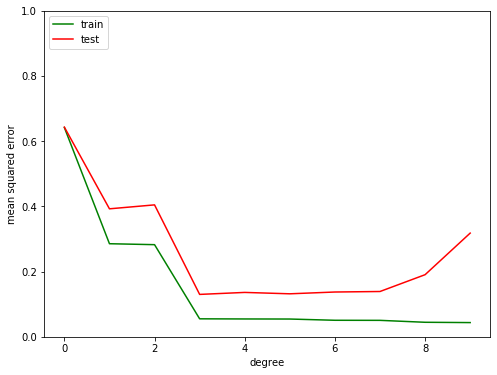

In [28]:
degrees = 10

train_error = []
test_error = []

for degree in range(degrees):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    train_error.append(mean_squared_error(y_train, model.predict(X_train)))
    test_error.append(mean_squared_error(y_test, model.predict(X_test)))

# Plot the training and test errors against degree
plt.figure(figsize=(8,6))
plt.plot(np.arange(degrees), train_error, color='green', label='train')
plt.plot(np.arange(degrees), test_error, color='red', label='test')
plt.ylim((0.0, 1e0))
plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='upper left')

**What do you notice?**

The higher the degree of the polynomial (our proxy for model complexity), the lower the training error. The testing error decreases too, but it eventually reaches its minimum at a degree of three and then starts increasing at a degree of seven. 

This is a visual demonstration of ***overfitting***: the model is already so complex that it fits the idiosyncrasies of our training data, idiosyncrasies which limit the model's ability to generalize (as measured by the testing error).

Another way of thinking about this is that the train and test errors should not be too different. If your training error is much smaller than your test error than you might be overfitting.

In the above example, the optimal choice for the degree of the polynomial approximation would be between three and six. So when we get some data, we could fit a bunch of polynomials and then choose the one that minimizes MSE (mean squared error).

### Homework

Let's read in this mystery dataset. Find an optimal polynomial for fitting the data. Write the equation of the polynomial.

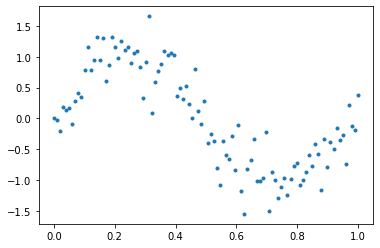

In [29]:
df = pd.DataFrame(data={'X':X_plot, 'y':y})
plt.plot(df['X'], df['y'], '.')

[0.6428569799355545, 0.3923873935615569, 0.40447737043879456, 0.1299769751291309, 0.13607075088367113, 0.13182194190253596, 0.1373108619299363, 0.138891174406178, 0.19043701794266601, 0.31792449365161496] [0 1 2 3 4 5 6 7 8 9]


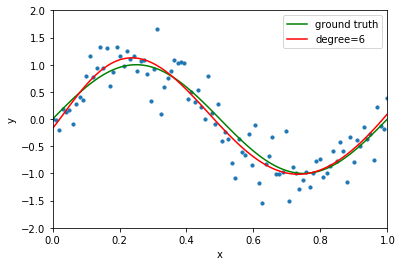

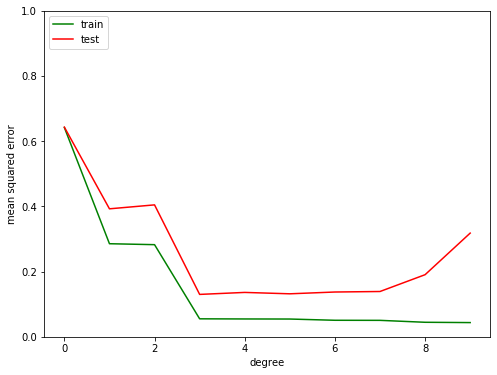

In [47]:
#insert work here
fig,ax = plt.subplots(1,1)
degree = 6
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X, y)
plot_approximation(model, ax, X_plot, y, label='degree=%d' % degree)

#Mean Error Squared
degrees = 10

train_error = []
test_error = []

for degree in range(degrees):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    train_error.append(mean_squared_error(y_train, model.predict(X_train)))
    test_error.append(mean_squared_error(y_test, model.predict(X_test)))

# Plot the training and test errors against degree
plt.figure(figsize=(8,6))
plt.plot(np.arange(degrees), train_error, color='green', label='train')
plt.plot(np.arange(degrees), test_error, color='red', label='test')
plt.ylim((0.0, 1e0))
plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='upper left')
print(test_error, np.arange(degrees))